# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Problem statement
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just two variables.

In [30]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  

import lux # new data visualization library , it appears as a toggle button

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(path)
s_data.head()     # we can see the toggle button after running this cell

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

**From above we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). and spliting that data into training and test sets.

# Preparing the data

In [11]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
s_data.shape

(25, 2)

In [13]:
train,test = train_test_split(s_data,test_size=0.25,random_state=123)

In [14]:
train.shape


(18, 2)

In [15]:
test.shape

(7, 2)

In [16]:
train_x=train.drop("Scores",axis=1)
train_y=train["Scores"]

In [17]:
test_x=test.drop("Scores",axis=1)
test_y=test["Scores"]

# Training the Algorithm

In [19]:
# We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train_x, train_y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

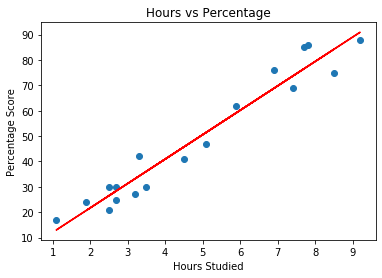

In [31]:
# Plotting the regression line # formula for line is y=m*x + c
line = regressor.coef_*train_x+regressor.intercept_

# Plotting for the test data
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.scatter(train_x,train_y)
plt.plot(train_x, line,color='r');
plt.show()

# Making predictions

In [26]:
# Now that we have trained our algorithm, it's time to make some predictions.
pr=regressor.predict(test_x)
list(zip(test_y,pr))

[(20, 16.874397005544534),
 (54, 48.61111111111111),
 (35, 38.99392501851517),
 (67, 61.11345303148581),
 (95, 88.04157409075442),
 (81, 82.27126243519687),
 (60, 55.343141375928255)]

# Evaluating the model

The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. 
There are many such metrics.

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,pr,squared=False)


4.797834650875306

In [29]:
hour =[9.25]
own_pr=regressor.predict([hour])
print("No of Hours = {}".format([hour]))
print("Predicted Score = {}".format(own_pr[0]))

No of Hours = [[9.25]]
Predicted Score = 91.407589223163
